In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [ ]:
data_len = 100
device = torch.device("cpu")
epoch = 1000
class RecursiveRNN(nn.Module):
    def __init__(self,teacher_forcing = False,scheduled_sampling = False,hidden_size = 5):
        super(RecursiveRNN,self).__init__()
        self.teacher_forcing = teacher_forcing
        self.scheduled_sampling = scheduled_sampling
        self.hidden_size = hidden_size
        self.l1 = nn.LSTM(1, hidden_size, num_layers=1,batch_first=True)
        self.linear = nn.Linear(hidden_size,1)
        self.decoder_hidden_init = (torch.rand(1,1, self.hidden_size,device=device), torch.rand(1,1,self.hidden_size,device=device))

    def forward(self,x):
        global device
        global data_len
        
        out_t = x[0][0][0]
        out_t = torch.reshape(out_t,(1,1,1))
        out = torch.zeros(1,1,data_len,device = device)
        decoder_hidden = self.decoder_hidden_init
        for i in range(data_len):
            if self.scheduled_sampling:
                if random.random() >= 0.5:
                    out_t = x[0][0][i].reshape(1,1,1)
            if self.teacher_forcing:
                out_t = x[0][0][i].reshape(1,1,1)
            out_t, decoder_hidden = self.l1(out_t, decoder_hidden)
            out_t = self.linear(out_t)
            out[0][0][i] = out_t[0][0][0]
        return out

In [ ]:
model = RecursiveRNN(scheduled_sampling = True)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [ ]:
x = np.linspace(0,10*math.pi,data_len)
x = torch.tensor(np.sin(x),device=device, dtype = torch.float32)
x = x.reshape(1,1,data_len)
loss_ls = np.zeros(epoch,dtype = 'float32')
for i in range(epoch):
    out = model(x)
    loss = loss_function(out,x)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_ls[i] = loss.item()

out,x

(tensor([[[ 0.2428,  0.3159,  0.4337,  0.7585,  0.8510,  0.9314,  0.8824,
            0.7631,  0.5219,  0.3117,  0.0867, -0.3319, -0.5711, -0.8889,
           -0.9899, -0.9772, -0.8876, -0.7153, -0.5273, -0.2943,  0.1176,
            0.3433,  0.5762,  0.7885,  0.9838,  1.0076,  0.9535,  0.8154,
            0.5302,  0.3093, -0.0657, -0.4396, -0.7761, -0.9519, -0.9835,
           -0.9461, -0.8489, -0.6519, -0.3711, -0.1301,  0.2350,  0.4625,
            0.6907,  0.8744,  0.9699,  0.9746,  0.8698,  0.6994,  0.4066,
            0.1845, -0.1785, -0.5480, -0.8414, -0.9705, -0.9853, -0.9279,
           -0.7995, -0.6327, -0.3250,  0.0081,  0.3356,  0.6499,  0.8511,
            0.9731,  0.9980,  0.9349,  0.7731,  0.5360,  0.3047,  0.0738,
           -0.1641, -0.5914, -0.8146, -0.9704, -0.9795, -0.9209, -0.8100,
           -0.5749, -0.3542,  0.0252,  0.3750,  0.6065,  0.8170,  0.9509,
            0.9875,  0.9338,  0.7936,  0.5410,  0.3138,  0.0831, -0.1536,
           -0.4186, -0.6831, -0.8668, 

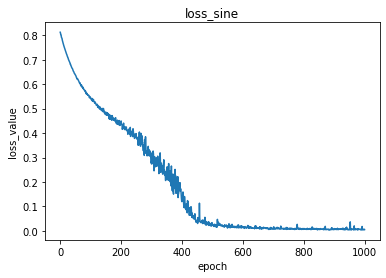

In [ ]:
plt.plot(np.arange(epoch),loss_ls)
plt.title("loss_sine")
plt.xlabel("epoch")
plt.ylabel("loss_value")
plt.show()

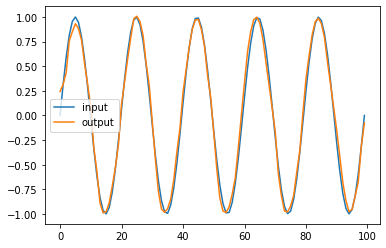

In [ ]:
in_sample = x.squeeze().to('cpu').detach().numpy().copy()
out_sample = out.squeeze().to('cpu').detach().numpy().copy()
plt.plot(np.arange(data_len),in_sample,label = "input")
plt.plot(np.arange(data_len),out_sample,label = "output")
plt.legend()
plt.show()

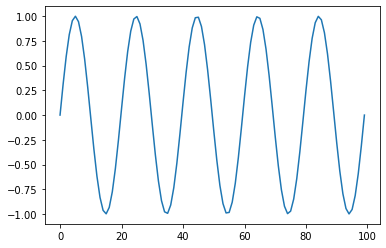

In [20]:
plt.plot(np.arange(data_len),in_sample)